Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [85]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [87]:
conda install -c conda-forge py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.5.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [1]:
conda install conda=23.11.0

^C

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv')

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
df.shape

(1599, 12)

In [13]:
# more informaton
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

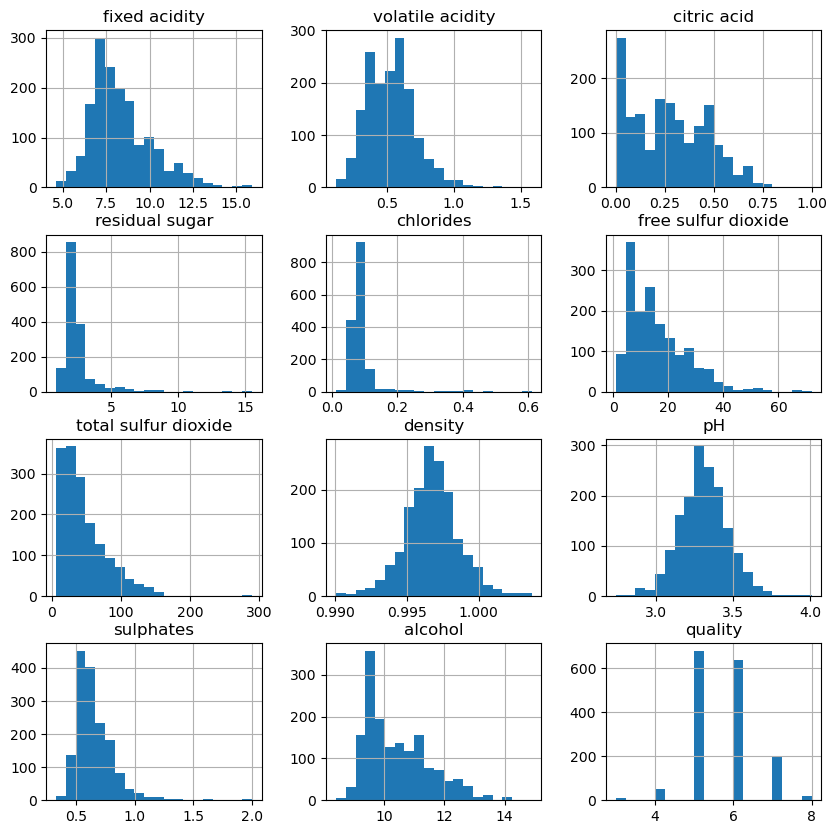

In [11]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

 Most of the Distribution is normal. the wine quality score  from 3 to approx 8

In [9]:
df.groupby('quality').mean()

NameError: name 'df' is not defined

DATA ANALYSYS by plotting graph

In [2]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='quality',data = df)
plt.title('Quality')
plt.show()

NameError: name 'plt' is not defined

Visualized the Correlation contents
Plot the heatmap to see the dependencies

<Axes: >

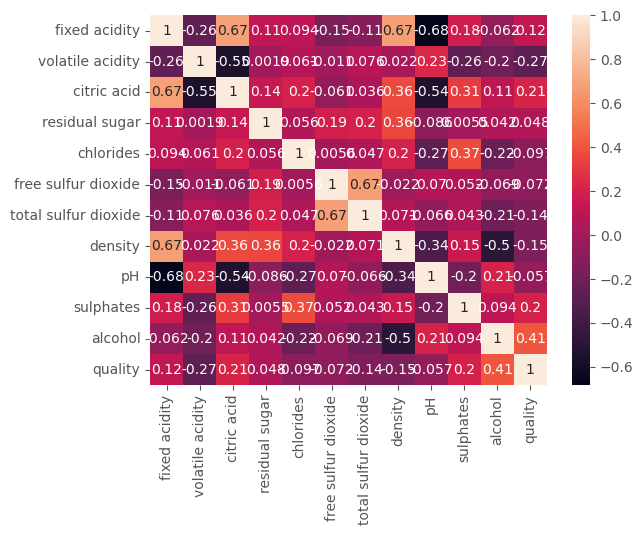

In [26]:
corr = df.corr()
sns.heatmap(corr,annot=True)

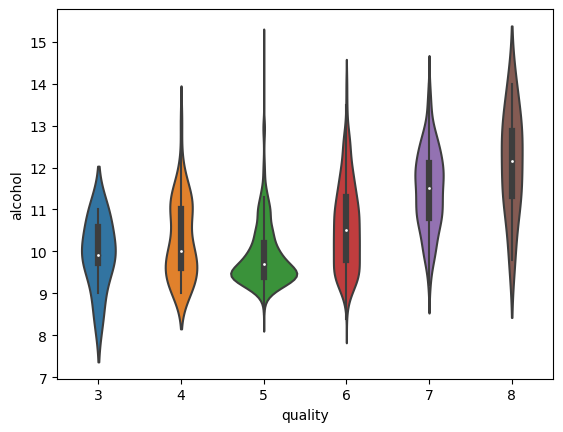

In [14]:
# plot the violin type plot
sns.violinplot(x='quality', y='alcohol', data=df)
plt.show()

After reading the Red Wine Quality dataset description we find,

quality >= 7 is “good”
quality <= 7 is “bad”

In [15]:
df['Goodquality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
# here 1 consider as Good quality and 0 as bad quality

In [16]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

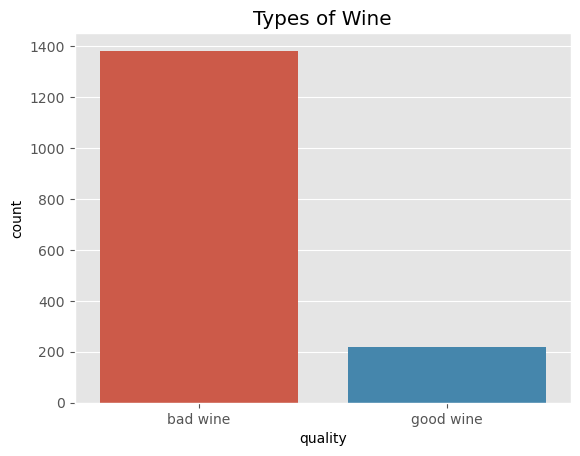

In [34]:
sns.countplot(data = df, x = 'quality')
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

In [17]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [18]:
X=df.drop(['Goodquality','quality'],axis=1)
y=df['Goodquality']


In [19]:
# Independent variable
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [20]:
# Dependent variable
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: Goodquality, Length: 1599, dtype: int64

In [21]:
#Split the dataset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=40)
 
xtrain.shape, xtest.shape

((1279, 11), (320, 11))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [24]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [27]:
## Train multiple models

models = [LogisticRegression(), XGBClassifier(),SVC(kernel='rbf')]
 
for i in range(3):
    models[i].fit(xtrain, ytrain)
 
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.59544218774988
Validation Accuracy :  0.5845588235294117

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7475490196078433

SVC() : 
Training Accuracy :  0.6135828135828136
Validation Accuracy :  

In [28]:
model_res=pd.DataFrame(columns=['Model','Score'])

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 

In [43]:
confusion_mat = confusion_matrix(xtest,ytest)
print(confusion_mat)
# not getting this
#metrics.confusion_matrix(models[1], xtest, ytest)
#plt.show()

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytest,y_pred))

Accuracy Score: 0.88125


In [30]:

print(metrics.classification_report(ytest,
                                    models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       272
           1       0.78      0.52      0.62        48

    accuracy                           0.91       320
   macro avg       0.85      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [48]:

#Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytest,y_pred))

Accuracy Score: 0.8875


In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your trained KNN model, dataset, and a new data point
#model = KNeighborsClassifier(...)  # Your trained KNN model
xtrain = ...  # Your training dataset
new_data_point = ...  # The data point you want to analyze

# Retrieve the k nearest neighbors
k = model.n_neighbors
neighbors = model.kneighbors([new_data_point], return_distance=False)[0]

# Examine feature values of those neighbors
for i in neighbors:
    print(X_train.iloc[i])  # Print feature values of each neighbor

NameError: name 'model' is not defined

In [50]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Your existing model training code
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print("Accuracy Score:", accuracy_score(ytest, y_pred))

# Analyzing Neighbors
new_data_point = xtest[0]  # Example: Analyze the first test data point
k = model.n_neighbors
neighbors = model.kneighbors([new_data_point], return_distance=False)[0]
print("Neighbors for prediction:")
for i in neighbors:
    print(xtrain.iloc[i])  # Examine feature values of each neighbor

# Permutation Importance
def permutation_importance(model, X_train, y_train):
    importances = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = shuffle(X_train[col])
        accuracy = accuracy_score(y_train, model.predict(X_train))
        importances.append(model.score(X_train, y_train) - accuracy)
        X_train[col] = save
    return importances

importances = permutation_importance(model, xtrain, ytrain)
print("Permutation Importances:")
for i, importance in enumerate(importances):
    print(f"{xtrain.columns[i]}: {importance:.4f}")


Accuracy Score: 0.88125
Neighbors for prediction:


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [51]:
# ... (previous code remains the same)

# Analyzing Neighbors
new_data_point = xtest[0]  # Example: Analyze the first test data point
k = model.n_neighbors
neighbors = model.kneighbors([new_data_point], return_distance=False)[0]
print("Neighbors for prediction:")
for i in neighbors:
    print(xtrain[i])  # Use array indexing to access neighbors' feature values

# ... (rest of the code remains the same)


Neighbors for prediction:
[0.40707965 0.19834711 0.34       0.04794521 0.08347245 0.05970149
 0.02120141 0.4845815  0.36220472 0.20359281 0.32307692]
[0.44247788 0.21487603 0.42       0.06849315 0.0984975  0.05970149
 0.02473498 0.47870778 0.32283465 0.25149701 0.32307692]
[0.44247788 0.23966942 0.37       0.09589041 0.13188648 0.13432836
 0.06007067 0.57195301 0.39370079 0.13772455 0.32307692]


TypeError: float() argument must be a string or a real number, not 'ellipsis'

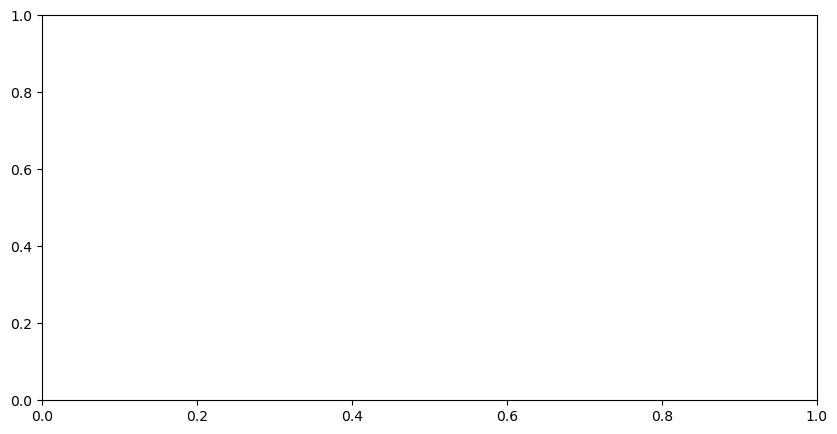

In [52]:
import matplotlib.pyplot as plt

# Assuming you have the neighbors' feature values in a NumPy array named "neighbors"
neighbors = np.array([[0.40707965, 0.19834711, ..., 0.32307692],
                      [0.44247788, 0.21487603, ..., 0.32307692],
                      [0.44247788, 0.23966942, ..., 0.32307692]])

# Create a parallel coordinates plot
plt.figure(figsize=(10, 5))
for i in range(neighbors.shape[0]):
    plt.plot(range(neighbors.shape[1]), neighbors[i], alpha=0.7)
plt.xlabel("Feature Number")
plt.ylabel("Feature Value")
plt.title("Parallel Coordinates Plot of Neighbors' Feature Values")
plt.show()